<a href="https://colab.research.google.com/github/cavedave/ai-email-classifier/blob/main/EmailClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Email classifier

This notebook makes a simple email classifier. You can then move it to a local system later.

## 1. Beginner Google Setup

If you have not programmed before and want to end the workshop with something you understand and can make local later the easiest is probably to use google colab. to do this you will need

1. A google account. And log into it.

2. Go to https://colab.research.google.com/ you can do this from github by clicking on the 'open in colab'

3. Get a key that will talk to Google Gemini. https://ai.google.dev/gemini-api/docs/api-key  to get api key. An api key is like a password that tells google you are allowed ask it questions.


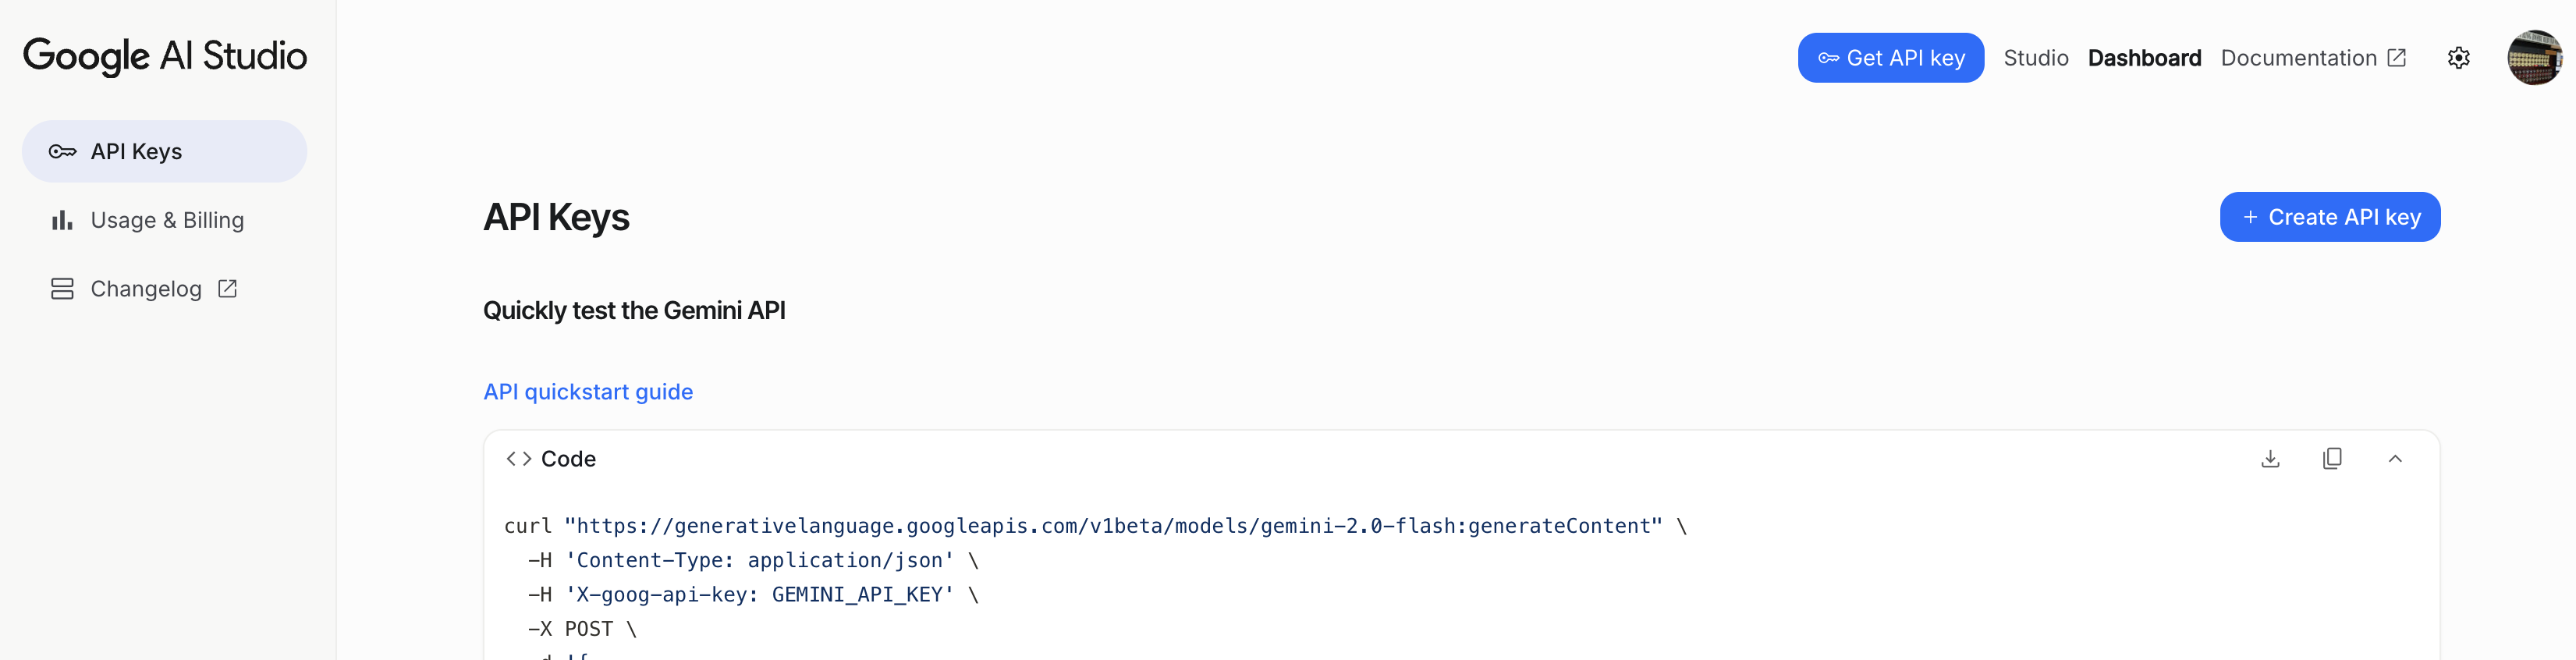

4. Then load a key into your secrets in google colab. The key on the left is secrets

<img src="figures/secrets.png" width="600">

You can load the key either directly or using the 'Gemini API keys' they have to link directly

<img src="figures/linkkey.png" width="600">

## 2. load libraries and such on a good network

In [ ]:
#test to make sure notebook is alive
1+1

In [ ]:
# Install the official Google Generative AI SDK
!pip install -U google-generativeai

# Import required libraries
import google.generativeai as genai
import ipywidgets as widgets
from IPython.display import display, HTML
from google.colab import userdata


In [ ]:
# Use Colab's secret manager to safely store your API key
try:
  API_KEY = userdata.get('GOOGLE_API_KEY')#i called this GEMINI_API_KEY in image above but google itself defaults to GOOGLE_API_KEY
  genai.configure(api_key=API_KEY)
  print('API key loaded and configured.')
except userdata.SecretNotFoundError:
  print('Please create a secret named "Google_API_KEY" in the Colab sidebar and paste your API key there.')
except Exception as e:
  print(f'An error occurred: {e}')

## 3. Define the Classification Logic

This is the prompt you will change later but its a good start.

In [ ]:
# Define the new labels and the JSON-enforced configuration
from google.colab import userdata
from google.generativeai import types

LABELS = ["CarBreakdown", "CarCrash", "CarRenewal", "CarTheft", "CarWindshield", "Other"]
PROMPT = f"""
You are an email classifier. I will give you text from an email and you will classify it into exactly one of the following categories: {', '.join(LABELS)}.

Your output must be a single word that is one of the categories above. Do not include any other text or punctuation.

Example 1:
Input: 'I can't start my engine this morning'
Output: CarBreakdown

Example 2:
Input: 'my car crashed into another car?'
Output: CarCrash

Example 3:
Input: 'what are your operating hours?'
Output: Other
"""

classify_config = types.GenerationConfig(
    response_mime_type="application/json",
    response_schema={
        "type": "string",
        "enum": LABELS,
    },
    temperature=0.0,
)

# The function that will run the classification
def classify_email(text):
    if not text:
        return 'No input text provided.'

    model = genai.GenerativeModel('gemini-1.5-flash', system_instruction="Return exactly one label for the user's message.")
    try:
        response = model.generate_content(PROMPT + f'\nInput: "{text}"\nOutput:', generation_config=classify_config)
        # The API is configured to return a string, so we can access it directly
        classification = response.text.strip().replace('"', '')
        return classification
    except Exception as e:
        return f'Error during classification: {e}'

For more on prompt engineering see Sergii's CHAI talk https://www.youtube.com/watch?v=xG2Y7p0skY4

Quick test

In [ ]:
# Classification (returns a Python string via .parsed)
# Now using the classify_email function defined in the UI cell

for text in [
    "windshield cracked and needs repair",
    "premium up 20% at renewal, add named driver?",
    "my car crashed into another car?",
    "car windshield broken can you help fix it?"
]:
    # Call the classify_email function
    classification = classify_email(text)
    # The classify_email function already returns the classification result
    print(text, "->", classification)

## 4. Create the Interactive User Interface

In [ ]:
# Create the input and output widgets
text_input = widgets.Textarea(
    placeholder='Enter text to classify...\n\nExample:\nwindshield cracked and needs repair\npremium up 20% at renewal, add named driver?\nmy car crashed into another car?',
    description='Text:',
    layout=widgets.Layout(width='100%', height='120px')
)

classify_button = widgets.Button(
    description='Classify',
    button_style='success',
    layout=widgets.Layout(width='auto', flex='1 1 auto')
)

clear_button = widgets.Button(
    description='Clear',
    button_style='warning',
    layout=widgets.Layout(width='auto', flex='1 1 auto')
)

output_area = widgets.Output()

# Define button click actions
def on_classify_button_clicked(b):
    with output_area:
        output_area.clear_output()
        input_text = text_input.value
        if input_text:
            classification_result = classify_email(input_text)
            html_output = f"""
            <div class="result-box">
                <p><strong>Input:</strong> {input_text}</p>
                <p><strong>Classification:</strong> <span style="color: #667eea; font-weight: bold;">{classification_result}</span></p>
                <hr style="margin: 10px 0; border: 1px solid #eee;">
            </div>
            """
            display(HTML(html_output))
        else:
            display(HTML('<div class="result-box"><p>Please enter some text to classify.</p></div>'))

def on_clear_button_clicked(b):
    text_input.value = ''
    with output_area:
        output_area.clear_output()

# Connect button actions to the functions
classify_button.on_click(on_classify_button_clicked)
clear_button.on_click(on_clear_button_clicked)

# Arrange the widgets
button_box = widgets.HBox([classify_button, clear_button], layout=widgets.Layout(justify_content='center'))
ui = widgets.VBox([
    widgets.HTML('<h1>LLM Email Classifier</h1><p>Simple text → classification using Gemini 2.5 Flash</p>'),
    widgets.HTML('<h3>Text Input</h3>'),
    text_input,
    button_box,
    widgets.HTML('<h3>Classification Result</h3>'),
    output_area
], layout=widgets.Layout(padding='10px', border='1px solid #ccc'))

# Display the user interface
display(ui)

**Examples to test**

car windshield broken

car windshield broken can you help fix it?

i crashed my car can i make a claim?



## What we dont have

1.   Improvement Testing to see how good this model or prompt is in a set of tests
2.   Full control over our training
3.   Run locally (If you have gmail and google drive that data not local)
4. A nice UI with Voila https://github.com/voila-dashboards/voila
5. An even nicer UI with streamlit



# Section 2:Very Basics of AI product Dev




## 2.1 Types of projects

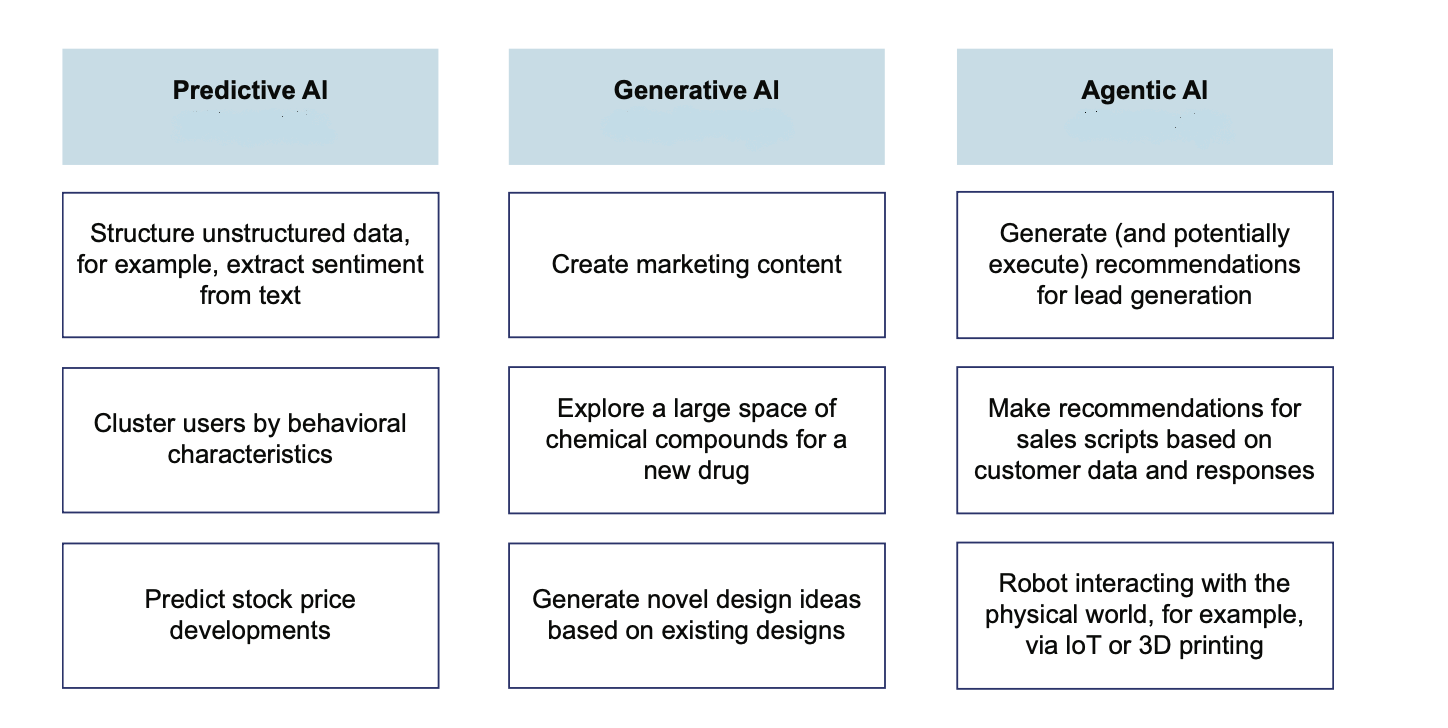

We are just doing predictive this evening. Agentic means program can call an API.


*   Get me the weather
*   Get me the unread emails
*   Get claims

## 2.2 Anatomy of AI System

What are you building?

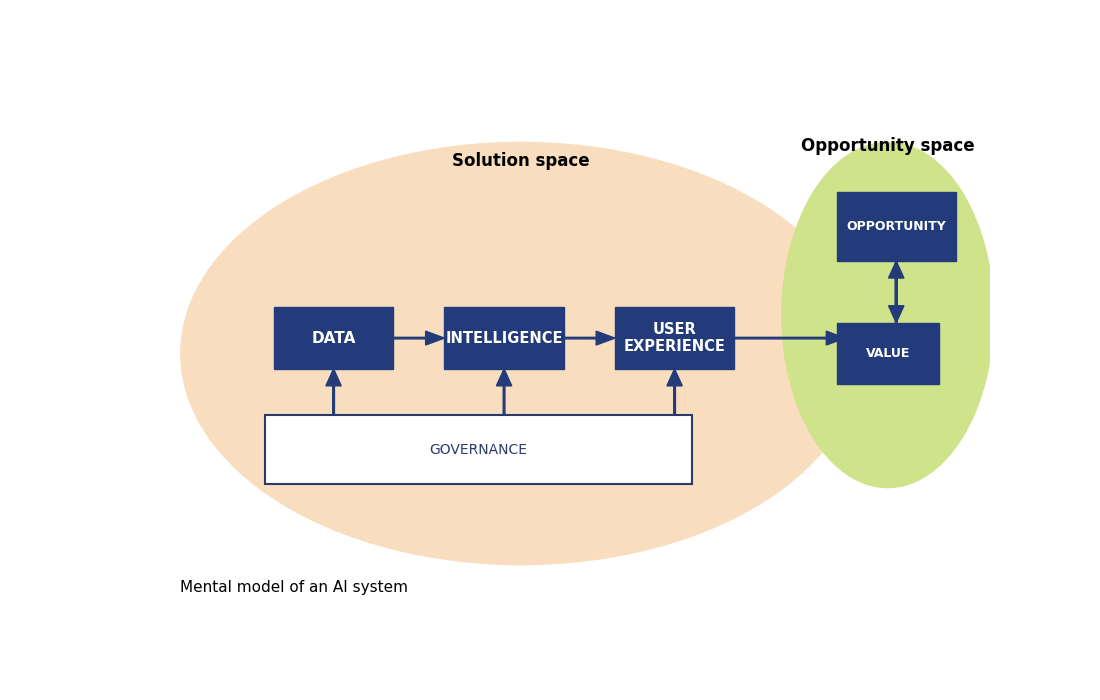

Governance is important. And includes 1. Can we look at this data. 2. who is running and learning from the intelligence.

Data is the a really common issue. Use real data. Manipulate it well is a major challenge. I broke this rule today

Intelligence (the ML and AI models) are easy. People obsess on these but they are not the primary issues usually.

User Experience Be able to tell a users journey down to the level of what they click when. And make sure you use the words they use. Building for yourself makes good User Experience easier.

Opportunity -What do we want to do

Value -How much would it be worth? How many people would use this tool.

A tool that runs only on your computer using only data that you use anyway. And that helps you make a decision. And the buck stops with you for that decision. Has a lot less governance issues than one used more widely. We are starting with those so you can prove value before having to tackle these trickier governance issues.

## 2.3 Who is this for?

In [ ]:
from IPython.display import Image, display

# Responsive image that fits the cell
display(Image(filename="figures/risk_reward_adoption_public.png", width="100%"))

As more people use a tool you need to make the **User interface** more polished

1. Just you Notebook like this
2. You and a coworker who sits beside you. As in they will tell you when things are wrong. Voila to make a notebook nice. https://github.com/voila-dashboards/voila
3. In your company but dont talk to daily. Streamlit. simple UI in python. And you will have to split out the code into python files.
4. People outside your company. Or even inside if there are enough. A full react web UI.

**Governance** also has levels like this. There are big steps between people in your company you know well, those you don't, and those outside the company.

**Value** changes at all these steps. Every new person is a multiplier of how much time a tool saves.

**Price** LLM price is about 1/10th a year ago for same quality. This means it can be worth having intelligence that is a loss for internal people for a short period. As it will be cheaper soon. For external people you could go broke fast as theres a lot of people who dont work in your company.


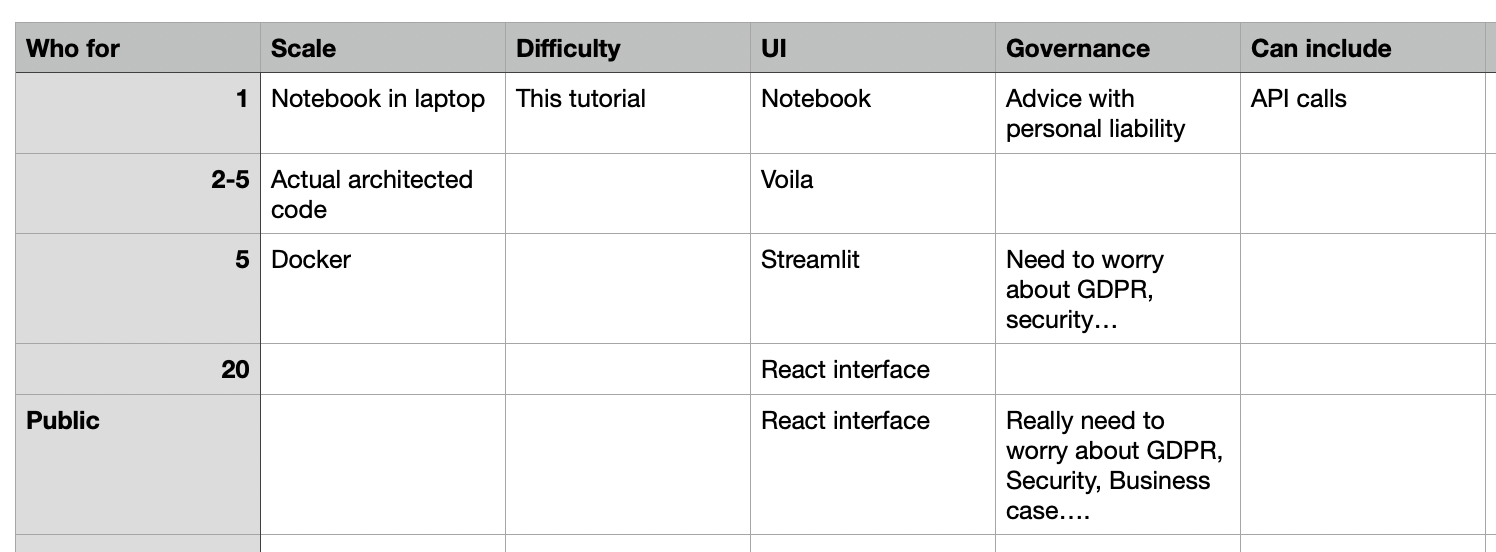

### Devops

<img src="figures/process2.png" width="600">

You do the same loop in your working. You try and get better mental models of the tasks you do based on things you learn as you work. But you don't consider getting your brain to learn to make decisions better training a model. You being personally better at classifying good/bad/urgent/valuable  invoice/request/email/sales_lead is improving a model in some sense.

And so when thinking about data collection and data processing think 'would this help me do the job better'? Would knowing the email provider tell me something about the email's writer? Would I like to know how often we had talked to them before? Do spelling mistakes tell me something?...

## 2.3 Is this worth doing?

You need to be able to estimate these costs.
If you build the tool yourself
- You can get Development and running really cheap
- You can fix the early mistakes cheaply (your time)
- You can limit what mistakes cost. Start with a tool that helps workers not talks to customers directly.
- Cost estimate for manual. Time it for a day.

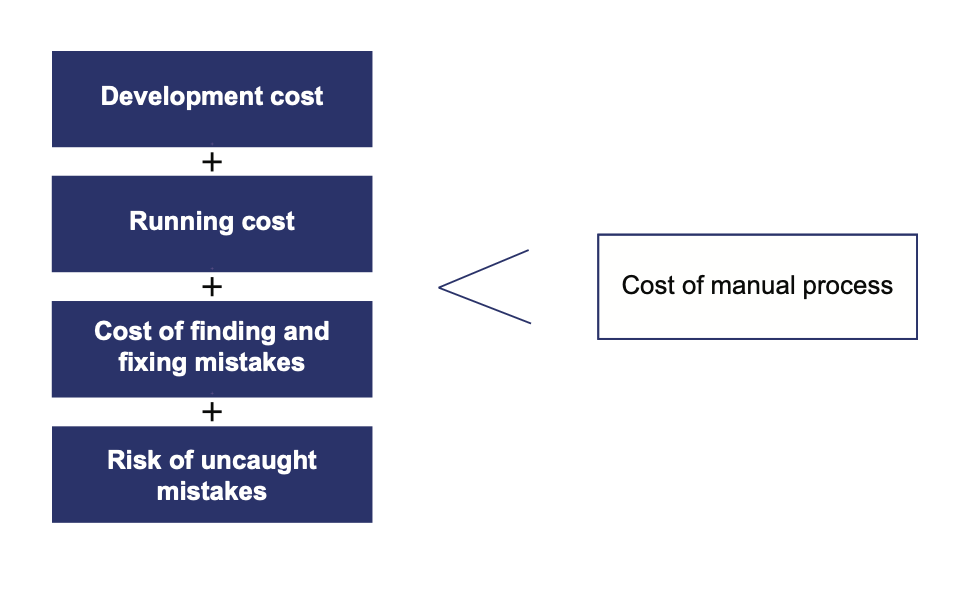